In [9]:
import pandas as pd

dataset = pd.read_parquet('./data/clean_data.parquet')
display(dataset.info())
display(dataset.head())


In [4]:
from src.data_processing.datasets import AuctionDataset

auction_dataset = AuctionDataset(processed_data_dir="./data/processed_splits", split_name="test")

In [11]:
cat, num, target = auction_dataset[0]
print(cat.tolist(), num.tolist(), target.tolist())

[3, 1, 76, 44, 20, 1, 76, 17, 797, 2] [0.45481619238853455, -0.18558049201965332, -0.1545756608247757, -0.11264967918395996, -0.3494034707546234, 1.36832857131958, 1.3651432991027832, -0.3001197278499603] 0.0


In [12]:
type(auction_dataset[0][0])

torch.Tensor

In [20]:
from src.exchange import Impression, ImpressionGenerator, OnlinePreprocessor

gen = ImpressionGenerator(parquet_path="./data/clean_data.parquet")
preprocessor = OnlinePreprocessor(preprocessor_dir="./preprocessors")

for impression in gen.stream():
    print(impression)
    # cat, num, target = preprocessor(impression, "9317")
    # print(cat.long().tolist(), num.float().tolist(), target.tolist())
    break


TypeError: ImpressionGenerator.__init__() got an unexpected keyword argument 'parquet_path'. Did you mean 'parquet_dir_path'?

In [3]:
import pandas as pd

d = pd.read_parquet('./data/clean_data.parquet')
ids = d["campaign_id"].unique()
print(ids)







[9317]


In [4]:
i = 10_000
print(i)

10000


In [6]:
import pandas as pd
results = pd.read_parquet('./runs/simulation_results.parquet')
results.head()

,imp_id,user_id,campaign_id,bid,market_price,win,pconv,expected_value,utility,budget_remaining
0,1,57,44584,4.514392,0.006798,True,0.247972,5.015991,5.009193,2670.358668
1,2,59,42540,0.057490,0.009215,True,0.002487,0.063878,0.054663,1015.376116
2,3,86,47465,19.578802,0.005971,True,0.896755,21.754224,21.748253,4403.701872
3,4,89,42540,1.010119,0.005346,True,0.043693,1.122354,1.117008,1015.370770
4,5,0,42540,17.624745,0.010008,True,0.762360,19.583050,19.573043,1015.360762


In [7]:
# write to csv
results.to_csv('./runs/simulation_results.csv', index=False)

In [1]:
# Keep pandas for display configuration and potentially viewing small results
import pandas as pd
import dask.dataframe as dd

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

impressions_path = './data/snapshot_20250429/impressions/'
conversions_path = './data/snapshot_20250429/conversions/'

# Load the datasets using Dask DataFrame
# This sets up a lazy computation graph, it doesn't load data immediately
print("Setting up Dask DataFrames...")
ddf_impressions = dd.read_parquet(impressions_path, engine='pyarrow')
ddf_conversions = dd.read_parquet(conversions_path, engine='pyarrow')
print("Dask DataFrames ready.")

# --- Operations with Dask ---

# Display the head - Dask computes only the necessary partitions for this
print("\nImpressions Head (computed by Dask):")
# dask_df.head() triggers computation and returns a pandas DataFrame
display(ddf_impressions.head())

print("\nConversions Head (computed by Dask):")
display(ddf_conversions.head())

# Get the structure/dtypes (this reads metadata, usually fast)
print("\nImpressions Info:")
ddf_impressions.info()

print("\nConversions Info:")
ddf_conversions.info()

# Example: Get the total number of rows (requires computation)
# print("\nComputing row counts (this may take time)...")
# num_impressions = len(ddf_impressions)
# num_conversions = len(ddf_conversions)
# print(f"Total Impressions: {num_impressions}")
# print(f"Total Conversions: {num_conversions}")

# Example: Perform an operation and get the result
# Any operation that requires the full dataset needs .compute()
# e.g., unique_users = ddf_impressions['user_id'].nunique().compute()
# print(f"Unique users in impressions: {unique_users}")

Setting up Dask DataFrames...
Dask DataFrames ready.

Impressions Head (computed by Dask):


,placement_id,dttm_utc,cnxn_type,user_agent,dma,country,os,prizm_premier_code,device_type,unique_id,aip_device_brand,aip_screen_width,aip_screen_height,aip_screen_ratio,aip_isp,aip_asn,aip_osName,aip_hardware,campaign_id,dte
0,156082,2025-01-01 00:14:18,Cable/DSL,iHeartRadio/2024120823423404 CFNetwork/1568.20...,819,us,unknown,<NA>,p,c1bcdd2d-3605-4fe4-a454-bf4943c90672,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8334,2025-01-01
1,156082,2025-01-01 00:42:26,Cable/DSL,Overcast/3.0 (+http://overcast.fm/; iOS podcas...,803,us,unknown,<NA>,p,34c39273-1d86-4647-8e1d-2870ac9ace8b,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8334,2025-01-01
2,156082,2025-01-01 01:49:14,Cable/DSL,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,803,us,Android,<NA>,<NA>,698f6577-a6da-4e16-8bb0-e2089a4fedf2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8334,2025-01-01
3,156082,2025-01-01 01:54:11,Corporate,Podcasts/4024.210.1 CFNetwork/1568.200.51 Darw...,624,us,unknown,<NA>,p,565df7c9-046a-419c-9260-cf8f0b1b179a,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8334,2025-01-01
4,156082,2025-01-01 02:32:25,Cable/DSL,iHeartRadio/2024120823423404 CFNetwork/1568.20...,862,us,unknown,<NA>,p,3da25606-b1ad-41a7-a0e4-777a84e2d4bd,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8334,2025-01-01



Conversions Head (computed by Dask):


,conv_dttm_utc,imp_click_dttm_utc,imp_click_placement_id,imp_click_unique_id,conv_property_id,conv_dma,conv_user_agent,goal_id,goal_name,conv_prizm_premier_code,conv_cnxn_type,conv_device_type,imp_click_campaign_id,dte
0,2025-01-01 06:57:58,2024-12-24 11:49:23,159676,fd9d16ba-fade-48e5-be9f-2006653d6045,1598,810,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,56855,content,<NA>,Cable/DSL,p,8334,2025-01-01
1,2025-01-01 14:20:43,2024-12-23 17:58:10,156101,1bde8423-039d-44db-87db-51233c0241da,1598,511,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,56857,signup,<NA>,Cable/DSL,d,8334,2025-01-01
2,2025-01-01 14:05:25,2024-12-22 03:36:12,159676,fdf814f6-7d83-4c9d-8c98-3e6d894b71e0,1598,506,Mozilla/5.0 (iPhone; CPU iPhone OS 18_1_1 like...,56856,lead,<NA>,Cable/DSL,p,8334,2025-01-01
3,2025-01-01 20:51:56,2024-12-23 13:15:35,159664,d6d4f245-5729-477e-b93d-8d5977bd4738,1598,539,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,56857,signup,<NA>,Cable/DSL,d,8334,2025-01-01
4,2025-01-01 00:17:53,2024-12-23 16:53:46,159671,d48a8c2a-845a-46a9-9e48-04c13aba8338,1598,527,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,56857,signup,<NA>,Cable/DSL,d,8334,2025-01-01



Impressions Info:
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 20 entries, placement_id to dte
dtypes: category(1), category(1), datetime64[ns](1), int32(1), int64(1), string(15)
Conversions Info:
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 14 entries, conv_dttm_utc to dte
dtypes: category(1), category(1), datetime64[ns](2), int32(1), int64(3), string(6)

In [6]:
# Get unique campaign IDs from conversions dataset
campaign_ids = dd.read_parquet(
    conversions_path,
    columns=['imp_click_campaign_id'],
    split_row_groups="adaptive",
    chunksize="64MB"
).imp_click_campaign_id.unique().compute()

In [8]:
len(campaign_ids)

93

In [11]:
import re
import os

conv_ids = [
    int(re.search(r"\d+", name).group())
    for name in os.listdir("./data/snapshot_20250429/conversions")
    if name.startswith("imp_click_campaign_id=")
]


In [14]:
conv_ids.sort()

len(conv_ids)
print(conv_ids[:10])

[8334, 13411, 13505, 14108, 14213, 14546, 16007, 17562, 18997, 19441]


In [5]:
import pandas as pd

df = pd.read_parquet("data/merged/train/campaign_id=42838/")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21324630 entries, 0 to 21324629
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   unique_id             string        
 1   impression_dttm_utc   datetime64[ns]
 2   user_agent            string        
 3   cnxn_type             string        
 4   dma                   float64       
 5   country               string        
 6   prizm_premier_code    string        
 7   campaign_id           float64       
 8   device_type           string        
 9   conv_dttm_utc         datetime64[ns]
 10  conversion_flag       float64       
 11  impression_hour       Int32         
 12  impression_dayofweek  Int32         
dtypes: Int32(2), datetime64[ns](2), float64(3), string(6)
memory usage: 1.9 GB


,impression_dttm_utc,dma,campaign_id,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek
count,21324630,2.132463e+07,21324630.0,210089,2.132463e+07,21324630.0,21324630.0
mean,2025-03-03 09:39:16.069474304,7.511904e+02,42838.0,2025-03-09 16:04:49.945855232,9.851941e-03,11.88661,2.935777
min,2025-01-06 17:34:02,0.000000e+00,42838.0,2025-01-06 19:33:35,0.000000e+00,0.0,0.0
25%,2025-02-04 17:36:51,8.030000e+02,42838.0,2025-02-15 05:17:28,0.000000e+00,5.0,1.0
50%,2025-03-02 14:54:08,8.030000e+02,42838.0,2025-03-09 19:18:15,0.000000e+00,13.0,3.0
75%,2025-03-30 02:26:17,8.030000e+02,42838.0,2025-04-03 10:56:35,0.000000e+00,18.0,5.0
max,2025-04-28 23:59:58,8.810000e+02,42838.0,2025-04-28 23:59:53,1.000000e+00,23.0,6.0
std,NaN,1.885284e+02,0.0,NaN,9.876680e-02,7.038602,1.989587


In [12]:
import dask.dataframe as dd
import pyarrow as pa
from dask.dataframe.utils import make_meta

meta_cols = {
    "campaign_id"          : "int64",
    "unique_id"            : "str",
    "impression_dttm_utc"   : "time64[ns]",
    "cnxn_type"            : "str",
    "user_agent"           : "str",
    "dma"                  : "str",
    "country"              : "str",
    "prizm_premier_code"   : "str",
    "device_type"          : "str",
    "conv_dttm_utc"        : "time64[ns]",
    "conversion_flag"      : "int8",
    "impression_hour"      : "Int32",
    "impression_dayofweek" : "Int32",
}
schema = pa.schema(meta_cols)

merged = dd.read_parquet(
    "./data/merged/train",
    engine="pyarrow",
    dataset={"schema": schema},
    dtype_backend="pyarrow",
    split_row_groups="adaptive",
    chunksize="64MB",
)

display(merged.head())
display(merged.info())
display(merged.describe())

display(merged[merged["conversion_flag"] == 1]["conversion_flag"].head())
print(f"Number of conversions: {len(merged[merged['conversion_flag'] == 1])}")
print(f"Total number of impressions: {len(merged)}")

,campaign_id,unique_id,impression_dttm_utc,cnxn_type,user_agent,dma,country,prizm_premier_code,device_type,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek
0,8334.0,d8d5f40a-9df4-4929-80eb-41a055f50cdf,2025-01-18 16:19:16,Cable/DSL,Podcasts/4024.310.3 CFNetwork/1568.300.101 Dar...,624.0,us,15,p,<NA>,0.0,16,5
1,8334.0,3e2d6cb4-e8e6-490f-9757-d9b6700f8424,2025-01-18 08:04:02,Cable/DSL,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,650.0,us,32,p,<NA>,0.0,8,5
2,8334.0,658b2cee-148b-4ba8-95ef-bf0819ba478c,2025-01-18 21:31:23,Cable/DSL,Podcasts/4024.400.4 CFNetwork/3826.400.120 Dar...,630.0,us,<NA>,p,<NA>,0.0,21,5
3,8334.0,46f6097d-e2b0-4d2f-807d-4c3f729a78e3,2025-01-18 17:50:22,Cable/DSL,Podcasts/4023.700.3 CFNetwork/1498.700.2 Darwi...,524.0,us,34,p,<NA>,0.0,17,5
4,8334.0,32ec0344-6d09-4f07-8769-987e0f1498df,2025-01-18 14:12:20,Cable/DSL,Podcasts/4024.210.1 CFNetwork/1568.200.51 Darw...,524.0,us,<NA>,p,<NA>,0.0,14,5


<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 13 entries, campaign_id to impression_dayofweek
dtypes: int32[pyarrow](2), int64[pyarrow](1), int8[pyarrow](1), string(7), time64[ns][pyarrow](2)

None

,campaign_id,conversion_flag,impression_hour,impression_dayofweek
npartitions=1,,,,
,double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow]
,...,...,...,...


312    1.0
313    1.0
314    1.0
315    1.0
316    1.0
Name: conversion_flag, dtype: double[pyarrow]

Number of conversions: 11088921
Total number of impressions: 1103345895


In [12]:
mem = merged.memory_usage(deep=True)

In [13]:
mem.head()

Index                       289476
campaign_id             8964686332
unique_id              48547219380
impression_dttm_utc     8964686332
cnxn_type              18514538439
dtype: int64

In [14]:
mpp = merged.memory_usage_per_partition(deep=True)
mpp.head()


0    59235393
dtype: int64

In [17]:
sizes = merged.map_partitions(lambda p: len(p.memory_usage(deep=True))).compute()
print(sizes.describe())

count    2193.0
mean       14.0
std         0.0
min        14.0
25%        14.0
50%        14.0
75%        14.0
max        14.0
dtype: float64


In [19]:
merged["user_agent"].head()


0    Podcasts/4024.310.3 CFNetwork/1568.300.101 Dar...
1    Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
2    Podcasts/4024.400.4 CFNetwork/3826.400.120 Dar...
3    Podcasts/4023.700.3 CFNetwork/1498.700.2 Darwi...
4    Podcasts/4024.210.1 CFNetwork/1568.200.51 Darw...
Name: user_agent, dtype: string

In [13]:
campaign_ids = merged["campaign_id"].unique().compute()
len(campaign_ids)

88

In [29]:
for campaign_id in campaign_ids:
    print(campaign_id, sep=", ")

42569.0
14213.0
43813.0
41142.0
45459.0
47386.0
45457.0
44165.0
45482.0
19442.0
47322.0
42838.0
43789.0
13411.0
47086.0
8334.0
47586.0
47462.0
43013.0
42517.0
43787.0
47451.0
13505.0
46975.0
44002.0
43662.0
42993.0
14546.0
42485.0
47205.0
42388.0
47245.0
47253.0
43015.0
42252.0
42751.0
45488.0
47465.0
44736.0
16007.0
44424.0
43423.0
43102.0
44923.0
43633.0
47191.0
42540.0
46536.0
47381.0
45460.0
42580.0
42593.0
43247.0
45363.0
44126.0
47259.0
40582.0
47009.0
47242.0
47589.0
19441.0
44729.0
42488.0
47193.0
47120.0
46729.0
18997.0
47362.0
47663.0
44867.0
17562.0
42844.0
47548.0
44120.0
47455.0
44584.0
44806.0
45432.0
45783.0
42915.0
47068.0
14108.0
47118.0
42300.0
45461.0
42943.0
43249.0
47170.0


In [61]:
meta_cols = {
    "campaign_id"          : "int64",
    "unique_id"            : "str",
    "impression_dttm_utc"   : "time64[ns]",
    "cnxn_type"            : "str",
    "user_agent"           : "str",
    "dma"                  : "int8", 
    "country"              : "str",
    "prizm_premier_code"   : "int8",
    "device_type"          : "str",
    "conv_dttm_utc"        : "time64[ns]",
    "conversion_flag"      : "int8",
    "impression_hour"      : "Int32",
    "impression_dayofweek" : "Int32",
}
schema = pa.schema(meta_cols)

df = dd.read_parquet("./data/merged/train/", dataset={"schema": schema}, engine="pyarrow", split_row_groups="adaptive")



In [62]:
c = df[df["campaign_id"] == 47663].compute()

In [57]:
c.head()

,campaign_id,unique_id,impression_dttm_utc,cnxn_type,user_agent,dma,country,prizm_premier_code,device_type,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek
0,47663.0,54a38808-b561-40d4-a99c-bba2e63cdd04,2025-04-02 23:14:57,Cable/DSL,python-urllib3/1.26.19,819.0,us,06,o,NaT,0.0,23,2
1,47663.0,7eb7d506-daac-4c93-be2d-97b322db1f1b,2025-04-02 23:55:24,Cellular,Spotify/9.0.30.642 Android/35 (Pixel 7a),0.0,us,<NA>,p,NaT,0.0,23,2
2,47663.0,d9d82167-b3bd-4f83-ad6f-34316754cceb,2025-04-02 23:23:08,Cable/DSL,Podcasts/4024.400.4 CFNetwork/3826.400.120 Dar...,613.0,us,02,p,NaT,0.0,23,2
3,47663.0,38045fce-eaab-4ae4-9584-a8e7c3656de2,2025-04-02 23:25:21,Cable/DSL,iHeartRadio/10.50.0 (Android 14; SM-G998U Buil...,617.0,us,30,p,NaT,0.0,23,2
4,47663.0,383cd8be-1637-4148-8306-77a22b372ebb,2025-04-02 22:23:18,Cellular,"Spotify/9.0.30 iOS/18.4 (iPhone14,7)",616.0,us,<NA>,p,NaT,0.0,22,2


In [51]:
{c: df.dtypes[c] for c in df.columns if c != "user_agent"}

{'campaign_id': dtype('int64'),
 'unique_id': string[pyarrow],
 'impression_dttm_utc': dtype('O'),
 'cnxn_type': string[pyarrow],
 'dma': string[pyarrow],
 'country': string[pyarrow],
 'prizm_premier_code': string[pyarrow],
 'device_type': string[pyarrow],
 'conv_dttm_utc': dtype('O'),
 'conversion_flag': dtype('int8'),
 'impression_hour': dtype('int32'),
 'impression_dayofweek': dtype('int32')}

In [1]:
from dask import dataframe as dd
cleaned_df = dd.read_parquet("./data/cleaned/train/", engine="pyarrow")
display(cleaned_df.head())


,unique_id,impression_dttm_utc,cnxn_type,dma,country,prizm_premier_code,device_type,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek,ua_browser,ua_os,ua_device_family,ua_device_brand,ua_is_mobile,ua_is_tablet,ua_is_pc,ua_is_bot,campaign_id
0,1d557f30-38e8-437a-aa33-3a8b8aa74784,2025-01-18 14:23:42,Cable/DSL,519,us,06,p,NaT,0,14,5,iHeartRadio,iOS,iOS-Device,Apple,True,False,False,False,8334
1,5f616019-31fb-4337-8ed5-0554344f1e51,2025-01-18 16:25:23,Cable/DSL,534,us,66,p,NaT,0,16,5,iHeartRadio,iOS,iOS-Device,Apple,True,False,False,False,8334
2,964267e9-ccb9-4db8-b641-bfe3cb15c73d,2025-01-18 00:12:05,Cable/DSL,803,us,42,p,NaT,0,0,5,iHeartRadio,iOS,iOS-Device,Apple,True,False,False,False,8334
3,0a93f47d-477c-4db9-83d4-c0d66fdc6612,2025-01-18 02:10:40,Cellular,770,us,<NA>,p,NaT,0,2,5,Spotify,iOS,iPhone,Apple,True,False,False,False,8334
4,4d968dde-03d9-402c-a914-b2cfcab311cd,2025-01-18 04:22:43,Cable/DSL,770,us,<NA>,p,NaT,0,4,5,Podcasts,iOS,iOS-Device,Apple,True,False,False,False,8334


In [8]:
display(cleaned_df[cleaned_df["conversion_flag"] == 1]["conversion_flag"].head())
print(f"Number of conversions: {len(cleaned_df[cleaned_df['conversion_flag'] == 1])}")
print(f"Total number of impressions: {len(cleaned_df)}")

20    1
21    1
22    1
23    1
24    1
Name: conversion_flag, dtype: int8

Number of conversions: 11088921
Total number of impressions: 1103345895


In [11]:
campaign_ids = cleaned_df["campaign_id"].unique().compute()
print(campaign_ids.tolist())
len(campaign_ids)


[13505, 43015, 44120, 47120, 47191, 47386, 47068, 47362, 47205, 41142, 43102, 47548, 47465, 44165, 42993, 47455, 47663, 43813, 45461, 42943, 43787, 45482, 47381, 47259, 42593, 47462, 42580, 44867, 47118, 17562, 18997, 42540, 43249, 43423, 45488, 47451, 19441, 19442, 43633, 47086, 47242, 14108, 42915, 44923, 47322, 42300, 44736, 14213, 45459, 47586, 8334, 42844, 44584, 42485, 16007, 42488, 43789, 47253, 45457, 42569, 14546, 44126, 44424, 45460, 46975, 44729, 44806, 43247, 47193, 45363, 45783, 47589, 42252, 43662, 40582, 42388, 44002, 45432, 47009, 42838, 47245, 43013, 13411, 42517, 46536, 46729, 42751, 47170]


88

In [14]:
brands = cleaned_df["ua_device_brand"].unique().compute()
print(brands.tolist())
len(brands)





['Motorola', 'HP', 'Qmobile', 'Bedove', 'SonyEricsson', 'Asus', 'BlackBerry', 'Nook', 'vivo', 'Odys', 'Panasonic', 'Azend', 'LOEWE', 'Tesla', 'XiaoMi', 'Cellular', 'Karbonn', 'Audiosonic', 'LYF', 'Apple', 'Sharp', 'Mito', 'Hisense', 'Toshiba', 'Meizu', 'Qmobilevn', 'Mediacom', 'Samsung', 'Microsoft', 'Generic', 'OEM', 'Philips', 'Itel', 'Aoson', 'Walton', 'Multilaser', 'Nokia', 'Thl', 'Metz', 'POLAROID', 'Sony', 'Lemon', 'Generic_Android', 'Haipad', 'Msi', 'Celkon', 'Fly', 'Spider', 'HTC', 'Nextbook', 'Google', 'Lenovo', 'Alcatel', 'HX49N2170WTS', 'Advent', 'Unknown', 'sprd', 'Sprint', 'IMO', 'LG', 'Bmobile', 'Proscan', 'Prestigio', 'Amazon', 'Acer', 'Texet', 'Hyundai', 'Nec', 'Oppo', 'openATV', 'Generic_Android_Tablet', 'Galapad', 'TCL', 'Sonic', 'Intex', 'Archos', 'Zopo', 'Gionee', 'Meta', 'ZTE', 'RCA', 'Simvalley', 'Dell', 'Huawei', 'Infinix', 'Fujitsu', 'Maxx', 'Lava', 'ChangJia', 'Micromax', 'PackardBell', 'Haier', 'Coolpad', 'Mpman', 'Generic_Inettv', 'OnePlus', 'Jiayu', 'Rockchi

107

In [30]:
for i, c in enumerate(cleaned_df.columns):
    print(i, " " * (3 - len(str(i))), c, " " * (20 - len(c)), cleaned_df[c].dtype)


0    unique_id             string
1    impression_dttm_utc   datetime64[ns]
2    cnxn_type             string
3    dma                   int16
4    country               string
5    prizm_premier_code    string
6    device_type           string
7    conv_dttm_utc         datetime64[ns]
8    conversion_flag       int8
9    impression_hour       int8
10   impression_dayofweek  int8
11   ua_browser            string
12   ua_os                 string
13   ua_device_family      string
14   ua_device_brand       string
15   ua_is_mobile          bool
16   ua_is_tablet          bool
17   ua_is_pc              bool
18   ua_is_bot             bool
19   campaign_id           category


In [6]:
import pandas as pd

sample_df = pd.read_parquet("./data/cleaned/train/campaign_id=8334/")
display(sample_df.head())
sample_df.info()
sample_df.describe(include="all")







,unique_id,impression_dttm_utc,cnxn_type,dma,country,prizm_premier_code,device_type,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek,ua_browser,ua_os,ua_device_family,ua_device_brand,ua_is_mobile,ua_is_tablet,ua_is_pc,ua_is_bot
0,1d557f30-38e8-437a-aa33-3a8b8aa74784,2025-01-18 14:23:42,Cable/DSL,519,us,06,p,NaT,0,14,5,iHeartRadio,iOS,iOS-Device,Apple,True,False,False,False
1,5f616019-31fb-4337-8ed5-0554344f1e51,2025-01-18 16:25:23,Cable/DSL,534,us,66,p,NaT,0,16,5,iHeartRadio,iOS,iOS-Device,Apple,True,False,False,False
2,964267e9-ccb9-4db8-b641-bfe3cb15c73d,2025-01-18 00:12:05,Cable/DSL,803,us,42,p,NaT,0,0,5,iHeartRadio,iOS,iOS-Device,Apple,True,False,False,False
3,0a93f47d-477c-4db9-83d4-c0d66fdc6612,2025-01-18 02:10:40,Cellular,770,us,<NA>,p,NaT,0,2,5,Spotify,iOS,iPhone,Apple,True,False,False,False
4,4d968dde-03d9-402c-a914-b2cfcab311cd,2025-01-18 04:22:43,Cable/DSL,770,us,<NA>,p,NaT,0,4,5,Podcasts,iOS,iOS-Device,Apple,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11318186 entries, 0 to 11318185
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   unique_id             string        
 1   impression_dttm_utc   datetime64[ns]
 2   cnxn_type             string        
 3   dma                   int16         
 4   country               string        
 5   prizm_premier_code    string        
 6   device_type           string        
 7   conv_dttm_utc         datetime64[ns]
 8   conversion_flag       int8          
 9   impression_hour       int8          
 10  impression_dayofweek  int8          
 11  ua_browser            object        
 12  ua_os                 object        
 13  ua_device_family      object        
 14  ua_device_brand       object        
 15  ua_is_mobile          bool          
 16  ua_is_tablet          bool          
 17  ua_is_pc              bool          
 18  ua_is_bot             bool          
dty

,unique_id,impression_dttm_utc,cnxn_type,dma,country,prizm_premier_code,device_type,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek,ua_browser,ua_os,ua_device_family,ua_device_brand,ua_is_mobile,ua_is_tablet,ua_is_pc,ua_is_bot
count,11318186,11318186,11318186,1.131819e+07,11318185,4879537,10325979,1455458,1.131819e+07,1.131819e+07,1.131819e+07,11318186,11318186,11318186,11318186,11318186,11318186,11318186,11318186
unique,10009507,NaN,3,NaN,76,68,9,NaN,NaN,NaN,NaN,187,21,3266,46,2,2,2,2
top,271d2233-973d-4373-8da4-c50deae365ea,NaN,Cable/DSL,NaN,us,05,p,NaN,NaN,NaN,NaN,Podcasts,iOS,iOS-Device,Apple,True,False,False,False
freq,1200,NaN,7142247,NaN,11312526,202653,9335792,NaN,NaN,NaN,NaN,4453947,7368321,5236931,7350466,9252272,10759986,11116287,10595265
mean,NaN,2025-02-27 16:31:12.515118848,NaN,6.136447e+02,NaN,NaN,NaN,2025-02-17 13:00:52.354008320,1.285946e-01,1.246438e+01,2.962109e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2025-01-01 00:00:02,NaN,0.000000e+00,NaN,NaN,NaN,2025-01-01 09:20:56,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2025-01-30 06:47:48,NaN,5.240000e+02,NaN,NaN,NaN,2025-01-31 02:43:32,0.000000e+00,7.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2025-02-24 19:05:08.500000,NaN,6.130000e+02,NaN,NaN,NaN,2025-02-09 16:17:58,0.000000e+00,1.300000e+01,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2025-03-27 09:42:45.750000128,NaN,7.530000e+02,NaN,NaN,NaN,2025-02-24 22:30:23.500000,0.000000e+00,1.900000e+01,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2025-04-28 23:59:52,NaN,8.810000e+02,NaN,NaN,NaN,2025-04-28 23:59:54,1.000000e+00,2.300000e+01,6.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


pr = sample_df["]

In [33]:
pr = sample_df["prizm_premier_code"]
display(pr.head())
display(pr.nunique())

# does it have any missing values?
display(pr.isnull().sum())








0      06
1      66
2      42
3    <NA>
4    <NA>
Name: prizm_premier_code, dtype: string

68

np.int64(6438649)

In [38]:
# cast to int8 and NA to -1, this is a categorical feature
pr = pr.fillna("-1")
pr = pr.astype("category")
display(pr.head())
display(pr.nunique())








0     6
1    66
2    42
3    -1
4    -1
Name: prizm_premier_code, dtype: category
Categories (69, int8): [-1, 1, 2, 3, ..., 65, 66, 67, 68]

69

In [48]:
# get campaign ids from dirs
import os
cids = []
for dir in os.listdir("./data/cleaned/train"):
    if dir.startswith("campaign_id="):
        cids.append(dir.split("=")[-1])

cids = [int(cid) for cid in cids]







In [49]:
print(cids)
print(len(cids))

[43247, 43249, 46536, 41142, 17562, 45783, 43813, 42751, 42993, 47086, 44867, 47191, 42488, 44120, 44923, 13411, 44126, 43787, 42838, 43789, 47170, 47548, 45482, 47386, 44736, 47381, 42252, 43662, 47663, 47451, 42540, 46729, 47253, 47068, 45363, 46975, 19442, 42943, 44424, 42388, 14546, 43013, 42300, 42569, 42593, 47242, 47245, 13505, 43423, 43015, 44002, 44806, 45457, 43102, 42485, 45459, 45461, 47362, 45432, 40582, 45460, 44584, 44729, 47193, 42844, 44165, 47586, 47120, 14213, 47118, 45488, 47589, 8334, 47322, 42517, 47259, 42915, 16007, 47455, 18997, 14108, 47009, 43633, 19441, 47205, 42580, 47462, 47465]
88


In [50]:
import pyarrow.dataset as ds

train_data_path = "./data/cleaned/train"

print("Loading training data sample...")
campaign_ids = [
    int(dir.split("=")[-1])
    for dir in os.listdir(train_data_path)
    if dir.startswith("campaign_id=")
]
n_rows_per_campaign = 100000

dset = ds.dataset(train_data_path, format="parquet", partitioning="hive")

dfs = []
for cid in campaign_ids:
    t = (dset
            .scanner(filter=ds.field("campaign_id") == cid)
            .head(n_rows_per_campaign)
            .to_pandas())
    dfs.append(t)

train_sample_df = pd.concat(dfs, ignore_index=True)

Loading training data sample...


In [51]:
display(train_sample_df.head())
display(train_sample_df.info())


,unique_id,impression_dttm_utc,cnxn_type,dma,country,prizm_premier_code,device_type,conv_dttm_utc,conversion_flag,impression_hour,impression_dayofweek,ua_browser,ua_os,ua_device_family,ua_device_brand,ua_is_mobile,ua_is_tablet,ua_is_pc,ua_is_bot,campaign_id
0,0641b610-46e1-4942-8219-7e8f7360739b,2025-02-13 14:00:44,Cable/DSL,881,us,62,<NA>,NaT,0,14,3,Chrome Mobile,Android,K,Generic_Android,True,False,False,False,43247
1,83210774-f78f-4875-947f-cce6bb7a7231,2025-02-13 00:02:36,Cellular,0,us,<NA>,p,NaT,0,0,3,Mobile Safari UI/WKWebView,iOS,iPhone,Apple,True,False,False,False,43247
2,edc9e8fb-d3de-478d-8b6b-53c1f5aaff77,2025-02-13 03:02:29,Cable/DSL,819,us,<NA>,p,NaT,0,3,3,Mobile Safari UI/WKWebView,iOS,iPhone,Apple,True,False,False,False,43247
3,9a7bfdba-a325-4c11-8490-184dff337b55,2025-02-13 21:04:03,Cellular,819,us,<NA>,<NA>,NaT,0,21,3,Chrome Mobile,Android,K,Generic_Android,True,False,False,False,43247
4,a9344837-70f3-495f-9553-8d3752ab8e3a,2025-02-13 00:32:54,Cable/DSL,881,us,25,o,NaT,0,0,3,Other,Other,Other,Unknown,False,False,False,False,43247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800000 entries, 0 to 8799999
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   unique_id             string        
 1   impression_dttm_utc   datetime64[ns]
 2   cnxn_type             string        
 3   dma                   int16         
 4   country               string        
 5   prizm_premier_code    string        
 6   device_type           string        
 7   conv_dttm_utc         datetime64[ns]
 8   conversion_flag       int8          
 9   impression_hour       int8          
 10  impression_dayofweek  int8          
 11  ua_browser            object        
 12  ua_os                 object        
 13  ua_device_family      object        
 14  ua_device_brand       object        
 15  ua_is_mobile          bool          
 16  ua_is_tablet          bool          
 17  ua_is_pc              bool          
 18  ua_is_bot             bool          
 19  

None

In [52]:
train_sample_df["campaign_id"].nunique()

88

In [54]:
import joblib
from pprint import pprint

category_sizes = joblib.load("./preprocessors/category_sizes.joblib")
pprint(category_sizes)






{'campaign_id': 89,
 'cnxn_type': 5,
 'country': 191,
 'dma': 212,
 'prizm_premier_code': 70,
 'ua_browser': 521,
 'ua_device_brand': 74,
 'ua_device_family': 7679,
 'ua_os': 28}


In [19]:
import dask.dataframe as dd

processed_data_path = "./data/processed/test"
pdf = dd.read_parquet(processed_data_path, engine="pyarrow")
display(pdf.head())
display(pdf.info())
display(pdf.describe())




,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,conversion_flag
0,0,1,113,178,53,283,15,6301,57,-1.424121,-0.289222,-0.293646,6.245333,-1.085481,-0.661012,-1.457872,-0.301795,0.0
1,0,1,194,178,31,311,24,7476,4,0.702188,-0.289222,-0.293646,-0.160120,1.574200,0.400710,-1.457872,-0.301795,0.0
2,0,1,80,178,44,311,24,7476,4,0.702188,-0.289222,-0.293646,-0.160120,-0.554074,1.250300,-1.457872,-0.301795,0.0
3,0,1,108,178,15,311,24,7476,4,0.702188,-0.289222,-0.293646,-0.160120,-1.085481,-0.661012,-1.457872,-0.301795,0.0
4,0,1,91,178,57,283,15,6301,57,-1.424121,-0.289222,-0.293646,6.245333,-0.854758,-0.950791,-1.457872,-0.301795,0.0


<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 18 entries, cat_0 to conversion_flag
dtypes: float32(9), int64(9)

None

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,conversion_flag
npartitions=1,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [20]:
# get num rows and num of conversion_flag == 1
print(len(pdf))
print(len(pdf[pdf["conversion_flag"] == 1]))





139405829
1352809


In [16]:
import pandas as pd

df = pd.read_parquet("./data/processed/train/part.917.parquet")
display(df.head())
display(df.info())
display(df.describe())


,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,conversion_flag
0,86,1,2,178,0,283,15,4449,66,-1.424121,-0.289222,-0.293646,-0.16012,-0.854758,-0.950791,-0.693303,-1.265204,0.0
1,86,3,95,178,0,100,22,4449,66,-1.424121,-0.289222,3.405455,-0.16012,-0.854758,-0.950791,-0.693303,-1.265204,0.0
2,86,1,158,178,0,41,1,6044,51,-1.424121,3.457557,-0.293646,-0.16012,-0.854758,-0.950791,-0.693303,-1.265204,0.0
3,86,1,61,178,32,41,1,6022,51,-1.424121,3.457557,-0.293646,-0.16012,-0.854758,-0.950791,-0.693303,-1.265204,0.0
4,86,3,34,178,54,283,15,4449,66,-1.424121,-0.289222,-0.293646,-0.16012,-0.854758,-0.950791,-0.693303,-1.265204,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   cat_0            1200000 non-null  int64  
 1   cat_1            1200000 non-null  int64  
 2   cat_2            1200000 non-null  int64  
 3   cat_3            1200000 non-null  int64  
 4   cat_4            1200000 non-null  int64  
 5   cat_5            1200000 non-null  int64  
 6   cat_6            1200000 non-null  int64  
 7   cat_7            1200000 non-null  int64  
 8   cat_8            1200000 non-null  int64  
 9   num_0            1200000 non-null  float32
 10  num_1            1200000 non-null  float32
 11  num_2            1200000 non-null  float32
 12  num_3            1200000 non-null  float32
 13  num_4            1200000 non-null  float32
 14  num_5            1200000 non-null  float32
 15  num_6            1200000 non-null  float32
 16  num_7            1

None

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,conversion_flag
count,1200000.0,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,86.0,1.277762e+00,8.738537e+01,1.776673e+02,1.780550e+01,2.202444e+02,1.473242e+01,5.540523e+03,3.034317e+01,-1.280259e-01,2.239123e-01,1.331775e-01,-1.596394e-01,-1.506680e-02,-3.823996e-02,-6.696381e-01,-2.765083e-01,1.002833e-02
std,0.0,5.893025e-01,6.819167e+01,6.469077e+00,2.090103e+01,1.167919e+02,9.957833e+00,1.939628e+03,2.648645e+01,1.037322e+00,1.288136e+00,1.181815e+00,5.547079e-02,1.005181e+00,9.904136e-01,7.244409e-01,1.025252e+00,9.963822e-02
min,86.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.424121e+00,-2.892215e-01,-2.936465e-01,-1.601196e-01,-1.279989e+00,-1.360601e+00,-1.457872e+00,-1.265204e+00,0.000000e+00
25%,86.0,1.000000e+00,2.500000e+01,1.780000e+02,0.000000e+00,1.020000e+02,1.000000e+00,4.449000e+03,4.000000e+00,-1.424121e+00,-2.892215e-01,-2.936465e-01,-1.601196e-01,-8.547581e-01,-9.507914e-01,-1.185000e+00,-1.265204e+00,0.000000e+00
50%,86.0,1.000000e+00,8.600000e+01,1.780000e+02,8.000000e+00,2.580000e+02,1.700000e+01,5.703000e+03,1.900000e+01,7.021877e-01,-2.892215e-01,-2.936465e-01,-1.601196e-01,-2.039207e-01,3.857644e-02,-6.933026e-01,-3.017951e-01,0.000000e+00
75%,86.0,1.000000e+00,1.430000e+02,1.780000e+02,3.400000e+01,3.110000e+02,2.400000e+01,7.476000e+03,6.600000e+01,7.021877e-01,-2.892215e-01,-2.936465e-01,-1.601196e-01,8.977553e-01,1.027944e+00,-8.016558e-02,8.995566e-01,0.000000e+00
max,86.0,3.000000e+00,2.100000e+02,1.880000e+02,6.800000e+01,5.110000e+02,2.400000e+01,7.673000e+03,7.200000e+01,7.021877e-01,3.457557e+00,3.405455e+00,6.245333e+00,1.623670e+00,1.437754e+00,5.329715e-01,1.434209e+00,1.000000e+00


In [17]:
import joblib
import os

preprocessor_dir = "./preprocessors"
cat_enc = joblib.load(os.path.join(preprocessor_dir, "categorical_encoder.joblib"))

cardinalities = [len(cat) for cat in cat_enc.categories_]
cardinalities


[88, 4, 211, 190, 69, 520, 27, 7678, 73]

In [18]:
cat_enc.categories_

[array([ 8334, 13411, 13505, 14108, 14213, 14546, 16007, 17562, 18997,
        19441, 19442, 40582, 41142, 42252, 42300, 42388, 42485, 42488,
        42517, 42540, 42569, 42580, 42593, 42751, 42838, 42844, 42915,
        42943, 42993, 43013, 43015, 43102, 43247, 43249, 43423, 43633,
        43662, 43787, 43789, 43813, 44002, 44120, 44126, 44165, 44424,
        44584, 44729, 44736, 44806, 44867, 44923, 45363, 45432, 45457,
        45459, 45460, 45461, 45482, 45488, 45783, 46536, 46729, 46975,
        47009, 47068, 47086, 47118, 47120, 47170, 47191, 47193, 47205,
        47242, 47245, 47253, 47259, 47322, 47362, 47381, 47386, 47451,
        47455, 47462, 47465, 47548, 47586, 47589, 47663]),
 array(['-1', 'Cable/DSL', 'Cellular', 'Corporate'], dtype=object),
 array([  0, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
        512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524,
        525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537,
        538, 53

In [3]:
from src.exchange import Impression, ImpressionGenerator, OnlinePreprocessor

gen = ImpressionGenerator("data/cleaned/test/", num_users=5)
preprocessor = OnlinePreprocessor(preprocessor_dir="./preprocessors")

for impression in gen.stream():
    continue
    # cat, num, target = preprocessor(impression, "9317")
    # print(cat.long().tolist(), num.float().tolist(), target.tolist())
    # break

Found 162 parquet files. Reading metadata...
Initialized ImpressionGenerator with 139405829 total rows across 162 files.


KeyboardInterrupt: 

In [8]:
from src.campaign import bootstrap_campaigns
from src.exchange import Market

market = Market()
campaigns = bootstrap_campaigns()
for _ in range(10):
    print(market._sample_price())
# generated_prices = []
# for campaign in campaigns:
#     for _ in range(10):
#         print(campaign.value_per_conv)
#         print(market.simulate(campaign.value_per_conv))



5.822888545680878
2.9726263628613605
7.276598473294034
8.002230142387154
1.884985857288642
2.607385927265014
5.330036648353139
4.268731097698171
4.958173037561384
3.263877639977906


In [2]:
import os
import pandas as pd

data_path = "./data/cleaned/train"

conv_rates = {}
for campaign_dir in os.listdir(data_path):
    if campaign_dir.startswith("campaign_id="):
        c_df = pd.read_parquet(os.path.join(data_path, campaign_dir))
        print(f"Total Imps  {campaign_dir}: {len(c_df)}")
        print(f"Total Convs {campaign_dir}: {len(c_df[c_df['conversion_flag'] == 1])}")
        rate = len(c_df[c_df['conversion_flag'] == 1]) / len(c_df)
        conv_rates[campaign_dir.split('=')[-1]] = rate

print("CONVERSION RATES")

print(conv_rates.keys())
print(conv_rates.values())



Total Imps  campaign_id=43247: 4194488
Total Convs campaign_id=43247: 11318
Total Imps  campaign_id=43249: 4269437
Total Convs campaign_id=43249: 111940
Total Imps  campaign_id=46536: 3871807
Total Convs campaign_id=46536: 2304
Total Imps  campaign_id=41142: 34070222
Total Convs campaign_id=41142: 118036
Total Imps  campaign_id=17562: 22428929
Total Convs campaign_id=17562: 8641
Total Imps  campaign_id=45783: 13049107
Total Convs campaign_id=45783: 1217
Total Imps  campaign_id=43813: 14115377
Total Convs campaign_id=43813: 1039058
Total Imps  campaign_id=42751: 30179783
Total Convs campaign_id=42751: 78691
Total Imps  campaign_id=42993: 21309207
Total Convs campaign_id=42993: 87782
Total Imps  campaign_id=47086: 2299864
Total Convs campaign_id=47086: 791
Total Imps  campaign_id=44867: 7991817
Total Convs campaign_id=44867: 6081
Total Imps  campaign_id=47191: 2382210
Total Convs campaign_id=47191: 1612
Total Imps  campaign_id=42488: 11138165
Total Convs campaign_id=42488: 49768
Total Im

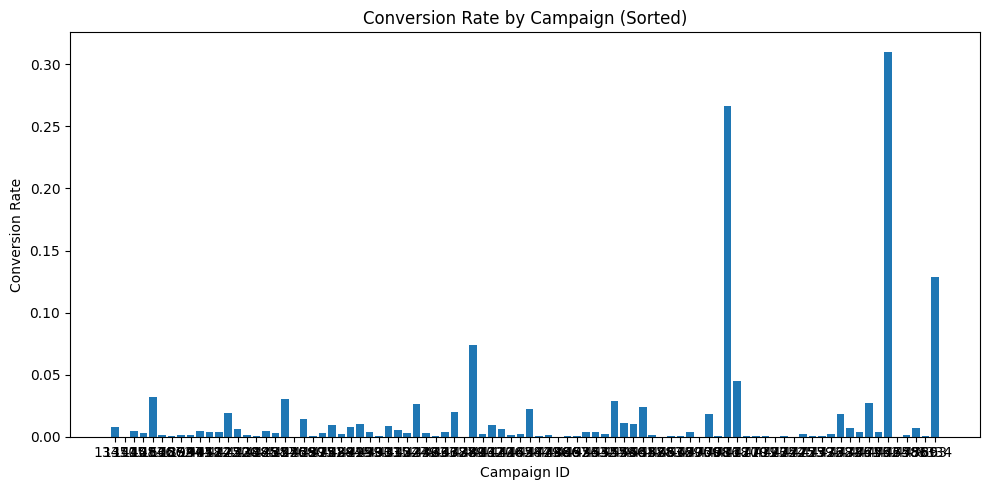

In [4]:
import matplotlib.pyplot as plt

# Step 1: Sort by campaign_id
sorted_items = sorted(conv_rates.items())  # sorts by key (campaign_id) ascending

# Step 2: Separate keys and values
campaign_ids = [k for k, _ in sorted_items]
rates = [v for _, v in sorted_items]

# Step 3: Plot
plt.figure(figsize=(10, 5))
plt.bar(campaign_ids, rates)
plt.xlabel("Campaign ID")
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Campaign (Sorted)")
plt.tight_layout()
plt.show() 

In [5]:
# sort conv_rates by value
sorted_conv_rates = dict(sorted(conv_rates.items(), key=lambda item: item[1], reverse=True))
print(sorted_conv_rates)

{'47465': 0.3102387576868887, '47118': 0.266126886177399, '8334': 0.12859463521804643, '43813': 0.07361177813387486, '47120': 0.04503834935070243, '14546': 0.032115538664350185, '42540': 0.030070537970513234, '45459': 0.028994399063502912, '47455': 0.02703381750325254, '43249': 0.026218913641306806, '45482': 0.023923961258857426, '44584': 0.02224011016382986, '43787': 0.01978860081013625, '42252': 0.019003305856087928, '47068': 0.018538771554439067, '47381': 0.018020652280831863, '42580': 0.0141764642346549, '45460': 0.010825483813828841, '45461': 0.010250525068647773, '42943': 0.010176279011318979, '42838': 0.009837966707980397, '44120': 0.00952769187271262, '43015': 0.008268285068707642, '42915': 0.007852748509365553, '13411': 0.007534713209500203, '47386': 0.007329249883097833, '47589': 0.006761700990471277, '44126': 0.006121870596852269, '42300': 0.005827087421672, '43102': 0.005756558527676142, '14108': 0.004646126682339851, '19442': 0.0045685317409677444, '42488': 0.0044682405046

In [6]:
c_num_imps = {}
count = 0
for campaign_dir in os.listdir(data_path):
    if campaign_dir.startswith("campaign_id="):
        c_df = pd.read_parquet(os.path.join(data_path, campaign_dir))
        c_num_imps[campaign_dir.split('=')[-1]] = len(c_df)
        count += 1
        print(count)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


In [7]:
c_num_imps = dict(sorted(c_num_imps.items(), key=lambda item: item[1], reverse=True))
print(c_num_imps)

{'13505': 73248848, '47548': 59453764, '42593': 42185093, '42580': 39496026, '47589': 37958496, '41142': 34070222, '42751': 30179783, '44729': 28032136, '40582': 26036078, '19442': 25499002, '44736': 25167170, '18997': 23776061, '43015': 23005738, '17562': 22428929, '42838': 21324630, '42993': 21309207, '44806': 18926337, '14546': 18158562, '14213': 15460658, '42844': 15189370, '42569': 15178529, '45460': 14475196, '42485': 14357640, '45461': 14311462, '43813': 14115377, '42388': 13601492, '44584': 13595751, '45783': 13049107, '42540': 12975990, '47362': 12693859, '19441': 12498159, '44002': 11826528, '45488': 11771850, '8334': 11318186, '42488': 11138165, '42517': 10410299, '14108': 10353140, '44165': 10202380, '43662': 9841520, '42300': 9830297, '45363': 9377589, '47009': 9329489, '43787': 9165125, '45457': 9161700, '42252': 8944128, '13411': 8232961, '44867': 7991817, '44120': 7989763, '42943': 7933843, '43013': 7887088, '43789': 7663857, '43423': 7467331, '42915': 7385949, '43633':

In [8]:
c_num_imps["8334"]


11318186

In [ ]:
import joblib
import torch
import numpy as np
from src.exchange import OnlinePreprocessor, Impression, ImpressionGenerator
from src.campaign import Campaign, bootstrap_campaigns
from src.models.network import ImpressionConversionNetwork


online_preprocessor = OnlinePreprocessor("./preprocessors")

cat_enc = joblib.load("./preprocessors/categorical_encoder.joblib")
CARDINALITIES = [
    len(cat) for cat in cat_enc.categories_
]

def load_model(ckpt_path: str, device: torch.device):
    model = ImpressionConversionNetwork(
        CARDINALITIES, numeric_dim=8, deep_embedding_dim=16
    )
    ckpt = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(ckpt["model_state"])
    model.to(device)
    model.eval()
    return model

model = load_model("runs/wad/20250505_234318/epoch_4.pt", device="mps")   

def scores_for_given_Imp(imp: Impression, elig: list[Campaign]):
    cat_tensors, num_tensors, carriers = [], [], []
    for c in elig:
        # The preprocessor returns (cat, num, target). We only need cat and num here.
        cat, num, _ = online_preprocessor(imp, c.id)
        cat_tensors.append(cat)
        num_tensors.append(num)
        carriers.append(c)  # Store the campaign object itself

    # Ensure tensors are created even if empty (shouldn't happen due to eligibility check, but safer)
    if not cat_tensors or not num_tensors:
        return  # Or handle appropriately

    cat_batch = torch.cat(cat_tensors, dim=0).to("mps")
    num_batch = torch.cat(num_tensors, dim=0).to("mps")

    pconv_batch_tensor: torch.Tensor
    with torch.no_grad():  # Keep no_grad for consistency, harmless for heuristics
        # predictor could be the ScriptModule or a Callable
        pconv_batch_tensor = model(cat_batch, num_batch)

    # Ensure output is on CPU and converted to numpy
    pconv_batch = pconv_batch_tensor.squeeze().cpu().numpy()
    # If batch size is 1, squeeze might remove the batch dim entirely, making it a scalar.
    # np.atleast_1d ensures it's always an array.
    pconv_batch = np.atleast_1d(pconv_batch)

    # Ensure number of predictions matches number of eligible campaigns
    if len(pconv_batch) != len(carriers):
        # Handle error: mismatch between predictions and campaigns
        # This might indicate an issue with the predictor's output shape
        print(
            f"Error: Mismatch in prediction batch size ({len(pconv_batch)}) and eligible campaigns ({len(carriers)})"
        )
        return

    # 3. Score & pick campaign ────────────────────────────────
    scores = []
    for pconv_val, camp in zip(pconv_batch, carriers):
        score: float
        # if camp.target_cpa is not None and camp.target_cpa > 0: # Avoid division by zero
        #     score = pconv_val / camp.target_cpa
        # else:
        score = pconv_val * camp.value_per_conv
        scores.append(score)

    metrics = {}
    for i, c in enumerate(carriers):
        metrics[c.id] = {
            "pconv": pconv_batch[i],
            "score": scores[i],
            "value_per_conv": c.value_per_conv,
            "true_conv_rate": c.true_conv_rate,
            "budget": c.budget_remaining,
        }

    return metrics


ig = ImpressionGenerator("data/cleaned/test/", num_users=5).stream()
for i, imp in enumerate(ig):
    if i == 0:
        imp = imp
        break

campaigns = bootstrap_campaigns(seed=42)
   
metrics = scores_for_given_Imp(imp, campaigns)

Found 162 parquet files. Reading metadata...
Initialized ImpressionGenerator with 139405829 total rows across 162 files.


In [ ]:
# convert to pandas dataframe
import pandas as pd
df = pd.DataFrame.from_dict(metrics, orient="index")
df.to_csv("runs/diag.csv", index=True)